In [0]:
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load in the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [0]:
# Build the model
i = Input(shape=x_train[0].shape)
x = LSTM(128)(i)
x = Dense(10, activation='softmax')(x)

model = Model(i, x)

In [4]:
# Compile and train
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.3519 - accuracy: 0.8869 - val_loss: 0.1155 - val_accuracy: 0.9638
Epoch 2/10
1875/1875 [==============================] - 48s 25ms/step - loss: 0.1065 - accuracy: 0.9689 - val_loss: 0.0902 - val_accuracy: 0.9741
Epoch 3/10
1875/1875 [==============================] - 48s 25ms/step - loss: 0.0733 - accuracy: 0.9775 - val_loss: 0.0722 - val_accuracy: 0.9772
Epoch 4/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0560 - accuracy: 0.9831 - val_loss: 0.0616 - val_accuracy: 0.9808
Epoch 5/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0437 - accuracy: 0.9865 - val_loss: 0.0538 - val_accuracy: 0.9843
Epoch 6/10
1875/1875 [==============================] - 48s 25ms/step - loss: 0.0390 - accuracy: 0.9876 - val_loss: 0.0404 - val_accuracy: 0.9875
Epoch 7/10
1875/1875 [==============================] - 48s 25ms/step - loss: 0.0322 - accuracy: 0.9902 - val_loss: 0.0462 -

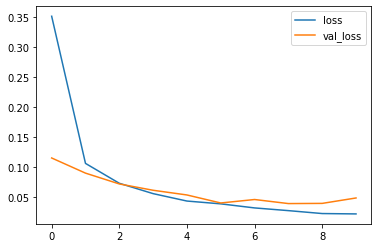

In [5]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

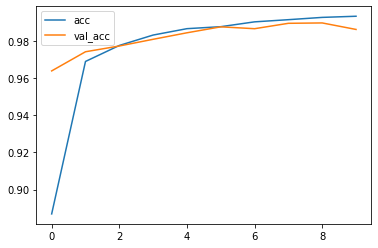

In [6]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[ 974    0    0    0    2    0    3    1    0    0]
 [   0 1131    1    0    0    0    2    1    0    0]
 [   2    0 1025    2    1    1    0    1    0    0]
 [   0    0    5 1000    0    2    0    1    2    0]
 [   0    0    0    0  959    1    5    4    2   11]
 [   1    0    2    8    0  878    1    0    2    0]
 [   2    2    0    1    3    2  946    0    1    1]
 [   1    4    8    1    0    0    0 1007    0    7]
 [   2    0    2    3    0    3    1    3  959    1]
 [   0    0    1    2    7    6    0    4    7  982]]


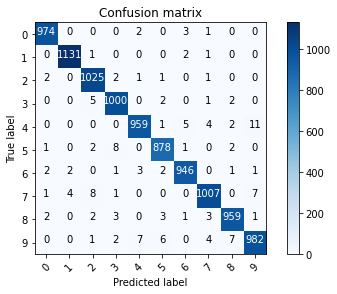

In [7]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 

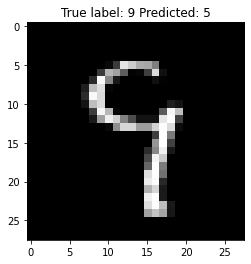

In [8]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));

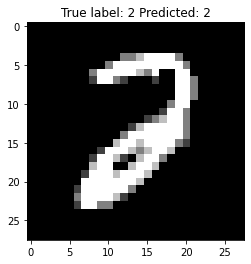

In [11]:
# Show some classified examples
classified = np.where(p_test == y_test)[0]
i = np.random.choice(classified)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));